# Machine Learning
### Textbook is available at: [https://www.github.com/a-mhamdi/isetbz](https://www.github.com/a-mhamdi/isetbz)

---

### K-Means Clustering

**Importing the libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.style.use("ggplot")

**Importing the dataset**

In [3]:
df = pd.read_csv("Datasets/Mall_Customers.csv")

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.rename(columns={"Annual Income (k$)":"Annual Income","Spending Score (1-100)": "Spending Score"}, inplace=True)

In [8]:
X = df.drop(columns=["CustomerID", "Age", "Gender"]).values
X[:10, :]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40],
       [17, 76],
       [18,  6],
       [18, 94],
       [19,  3],
       [19, 72]])

Import `KMeans` class

In [9]:
from sklearn.cluster import KMeans

**OPTIONAL: IF NOT FAMILIAR WITH `KMEANS`, FEEL FREE TO SKIP THE FOLLOWING CELL**

---

**Using the elbow method to find the optimal number of clusters**

---

**Training the K-Means model on the dataset**

In [10]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=123)
y_pred = kmeans.fit_predict(X)

In [11]:
centers = kmeans.cluster_centers_

**Visualizing the clusters**

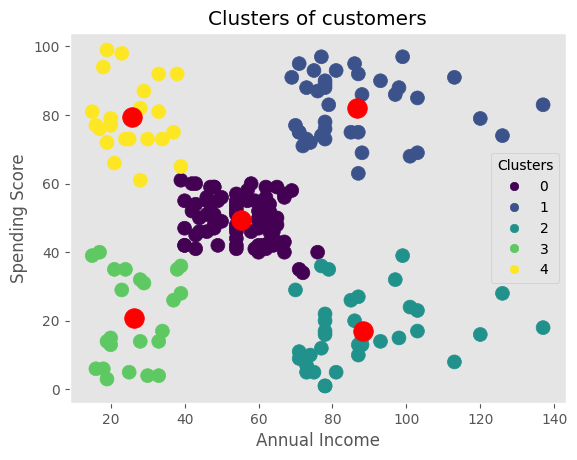

In [12]:
fig, ax = plt.subplots()
scatter =  ax.scatter(X[:, 0], X[:, 1], c=y_pred, s=100)
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)
ax.scatter(centers[:, 0], centers[:, 1], c="red", s=200)
ax.set_title("Clusters of customers")
ax.set_xlabel("Annual Income")
ax.set_ylabel("Spending Score")
ax.grid()